# Plot Entropy of Gaussian

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quadrature

Text(0.5, 0, 'standard deviation $\\sigma$')

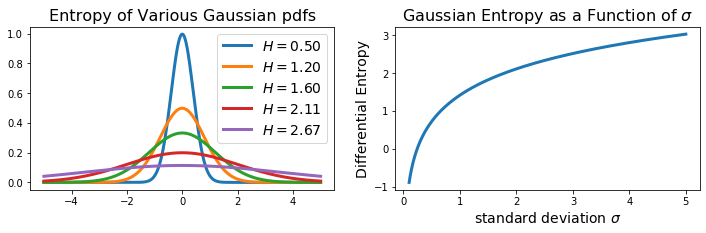

In [5]:
def exact_entropy(s):
    return np.log(s*np.sqrt(2*np.pi*np.e))
sigmas = [0.4,0.8,1.2,2.0,3.5]
x_pts = np.linspace(-5,5,1000)
fig, axs = plt.subplots(1,2,figsize=(12,3))
axs[0].set_title("Entropy of Various Gaussian pdfs", fontsize=16)
for s in sigmas:
    h = exact_entropy(s)
    axs[0].plot(x_pts, norm.pdf(x_pts,loc=0,scale=s), label="$H={:0.2f}$".format(h), lw=3)
axs[0].legend(prop={'size': 14})
axs[1].set_title("Gaussian Entropy as a Function of $\sigma$", fontsize=16)
axs[1].plot(np.linspace(0.1,5,1000), exact_entropy(np.linspace(0.1,5,1000)), lw=3)
axs[1].set_ylabel("Differential Entropy", fontsize=14)
axs[1].set_xlabel("standard deviation $\sigma$", fontsize=14)

# Plot Entropy Element as Function of Information

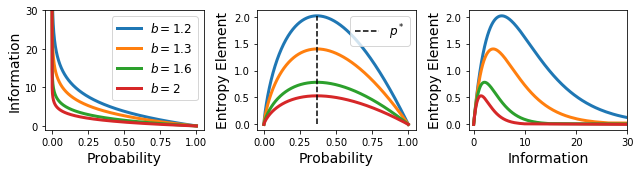

In [75]:
x_pts = np.linspace(1e-9,1,1000)
fig, axs = plt.subplots(1,3,figsize=(9,2.5))
#axs[0].set_title("Information", fontsize=16)
for b in [1.2,1.3,1.6,2]:
    I = -np.log(x_pts)/np.log(b)
    axs[0].plot(x_pts, I, label=f"$b={b}$", lw=3)
    axs[1].plot(x_pts, x_pts*I, lw=3)
    axs[2].plot(I, x_pts*I, label=f"$b={b}$", lw=3)
axs[0].legend(prop={'size': 12})
axs[0].set_ylabel("Information", fontsize=14)
axs[0].set_xlabel("Probability", fontsize=14)
axs[0].legend(prop={'size': 12})
axs[0].set_ylim(-1,30)
axs[1].plot([np.e**(-1)]*2,[0,-(1/np.e)*(np.log(np.e**(-1))/np.log(1.2))],ls='dashed',c='k',label="$p^*$")
axs[1].set_ylabel("Entropy Element", fontsize=14)
axs[1].set_xlabel("Probability", fontsize=14)
axs[1].legend(prop={'size': 12})
axs[2].set_ylabel("Entropy Element", fontsize=14)
axs[2].set_xlabel("Information", fontsize=14)
#axs[2].legend(prop={'size': 11})
axs[2].set_xlim(-1,30)
plt.tight_layout()

# Compare Entropy of Gaussian to Entropy of GMM

In [275]:
class GMM(): # gaussian mixture model
    
    def __init__(self, pis, params, normed=False):
        self.params = np.array(params) # [[mu1, sig1], [mu2, sig2],...]
        self.components = self.params.shape[0]
        self.pis = np.array(pis)
        self.max_val = 1
        self.normed = normed
        if self.normed:
            vals = self.__call__(np.linspace(0,1,10000))
            self.max_val = vals.max()
            
    def __call__(self, x):
        pis = self.pis
        p = self.params
        sz = self.components
        vals = np.array([pis[i]*norm.pdf(x,*(p[i])) for i in range(sz)]).sum(axis=0)
        if self.normed:
            vals /= self.max_val
        return vals
    
    def sample(self, n_samples=1):
        mode_id = np.random.choice(self.components, size=n_samples, replace=True, p=self.pis)
        return np.array([norm.rvs(*(self.params[i])) for i in mode_id])
    
def entropy(p,domain):
    def f_i(x):
        p_i = p(x)
        return -p_i*np.log(p_i) 
    quad_rslt, quad_err = quadrature(f_i, domain[0], domain[1], tol=1e-8, maxiter=1000)
    return (quad_rslt, quad_err)

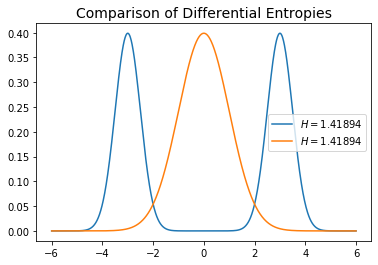

In [278]:
gmm_var = 0.5
num_modes = 2
gmm = GMM([1/num_modes]*num_modes, [[loc,gmm_var] for loc in np.linspace(-3,3,num_modes)])
g_var = 1.0
p = lambda x: norm.pdf(x,loc=0,scale=g_var)
x_pts = np.linspace(-6,6,1000)
domain = [-6,6]
plt.plot(x_pts, gmm(x_pts), label="$H={:0.5f}$".format(entropy(gmm,domain)[0]))
plt.plot(x_pts, p(x_pts), label="$H={:0.5f}$".format(exact_entropy(g_var)))
plt.title("Comparison of Differential Entropies", fontsize=14)
plt.legend()

In [1]:
5285.57-3215.80

2069.7699999999995